In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [2]:
data = pd.read_excel("D:\ExcelR Assignments\Question\Clustering\Clustering\EastWestAirlines.xlsx",
                     sheet_name='data')

In [3]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [5]:
data.duplicated().sum()

np.int64(0)

In [6]:
data.drop_duplicates(inplace = True)

#### Handling Null Values

In [7]:
data.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

### EDA

In [8]:
data.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

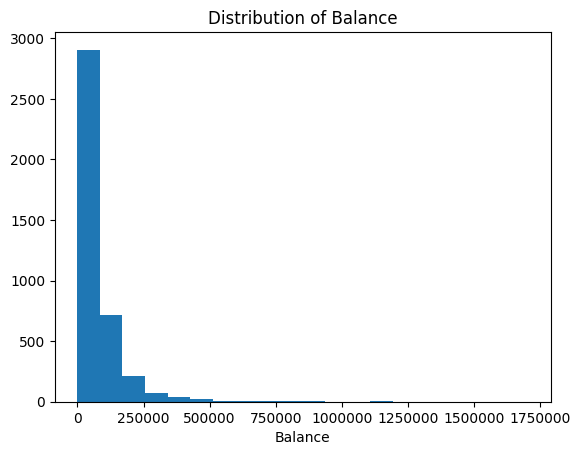

In [10]:
plt.hist(data['Balance'],bins = 20);
plt.ticklabel_format(style='plain')
plt.title("Distribution of Balance")
plt.xlabel("Balance");

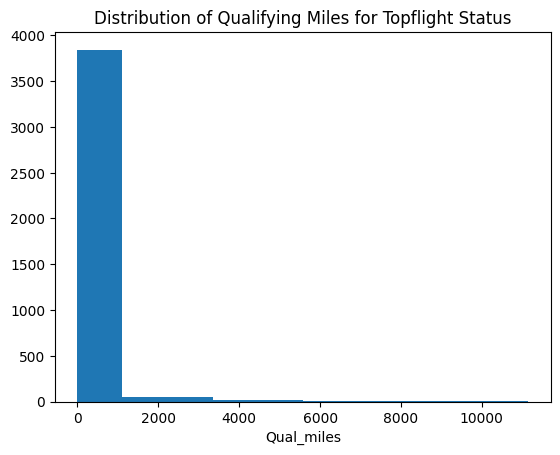

In [11]:
plt.hist(data['Qual_miles']);
plt.title("Distribution of Qualifying Miles for Topflight Status")
plt.xlabel("Qual_miles");

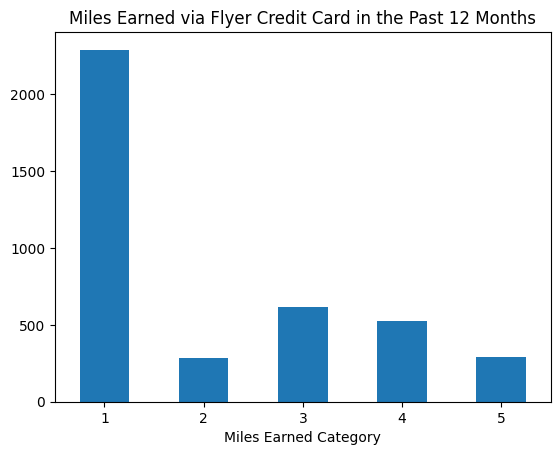

In [12]:
# values_counts are used to group all same values and sort_index is used to sort index in numerical order
data['cc1_miles'].value_counts().sort_index().plot(kind='bar') 
plt.title('Miles Earned via Flyer Credit Card in the Past 12 Months')
plt.xlabel('Miles Earned Category')
plt.xticks(rotation=0);


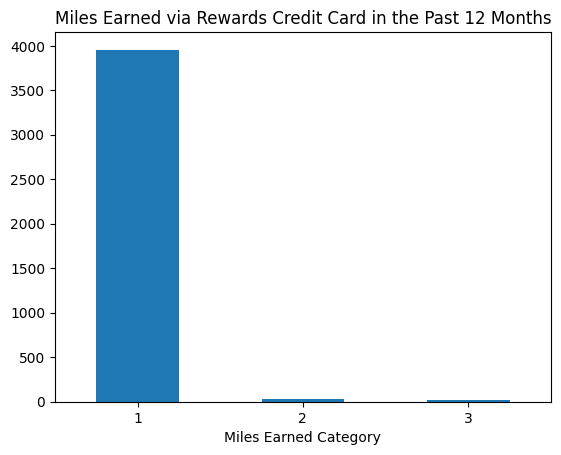

In [13]:
data['cc2_miles'].value_counts().sort_index().plot(kind='bar') 
plt.title('Miles Earned via Rewards Credit Card in the Past 12 Months')
plt.xlabel('Miles Earned Category')
plt.xticks(rotation=0);

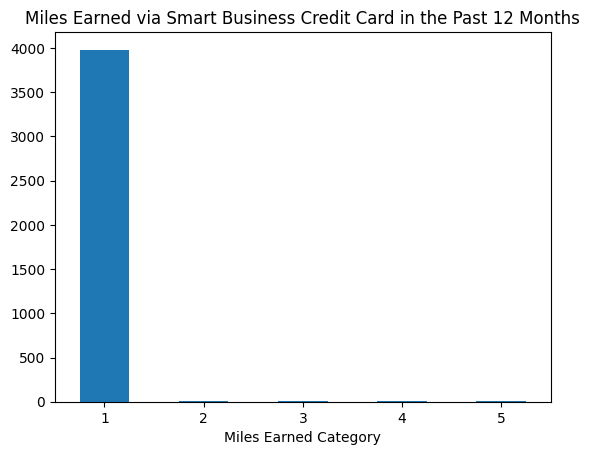

In [14]:
data['cc3_miles'].value_counts().sort_index().plot(kind='bar') 
plt.title('Miles Earned via Smart Business Credit Card in the Past 12 Months')
plt.xlabel('Miles Earned Category')
plt.xticks(rotation=0);

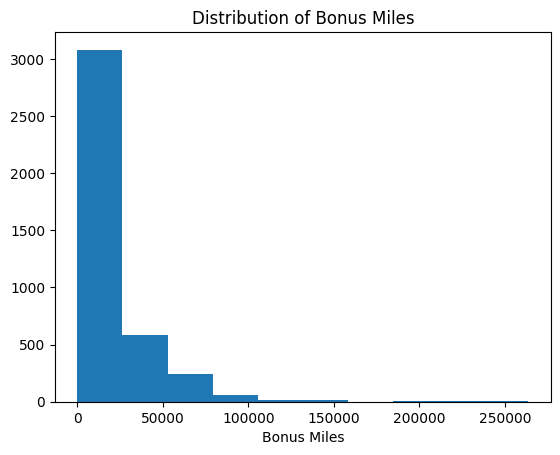

In [16]:
plt.title('Distribution of Bonus Miles')
plt.xlabel('Bonus Miles')
plt.hist(data['Bonus_miles']);

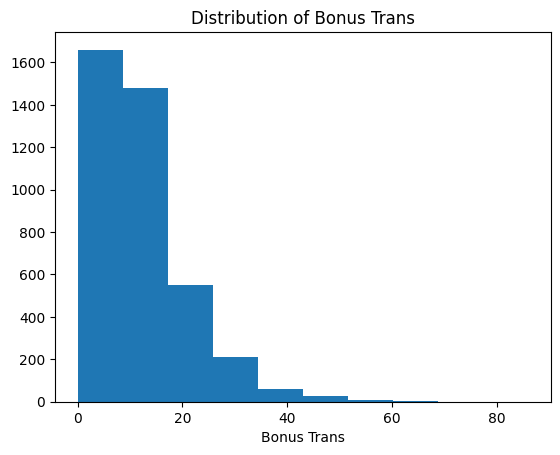

In [17]:
plt.title('Distribution of Bonus Trans')
plt.xlabel('Bonus Trans')
plt.hist(data['Bonus_trans']);

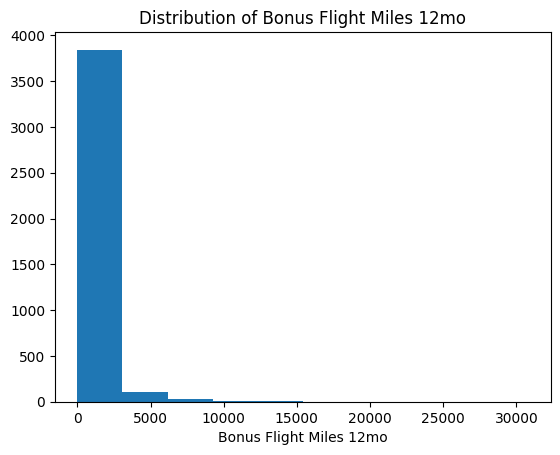

In [18]:
plt.title('Distribution of Bonus Flight Miles 12mo')
plt.xlabel('Bonus Flight Miles 12mo')
plt.hist(data['Flight_miles_12mo']);

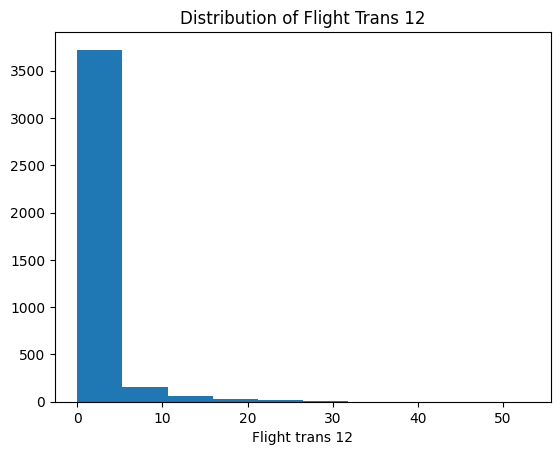

In [19]:
plt.title('Distribution of Flight Trans 12')
plt.xlabel('Flight trans 12')
plt.hist(data['Flight_trans_12']);

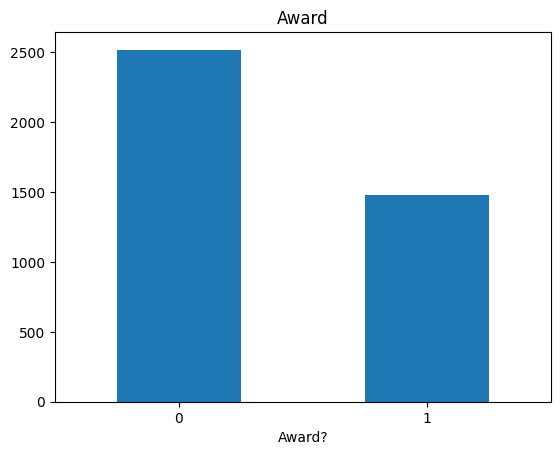

In [20]:
data['Award?'].value_counts().sort_index().plot(kind='bar')
plt.title('Award')
plt.xticks(rotation=0);

<Axes: >

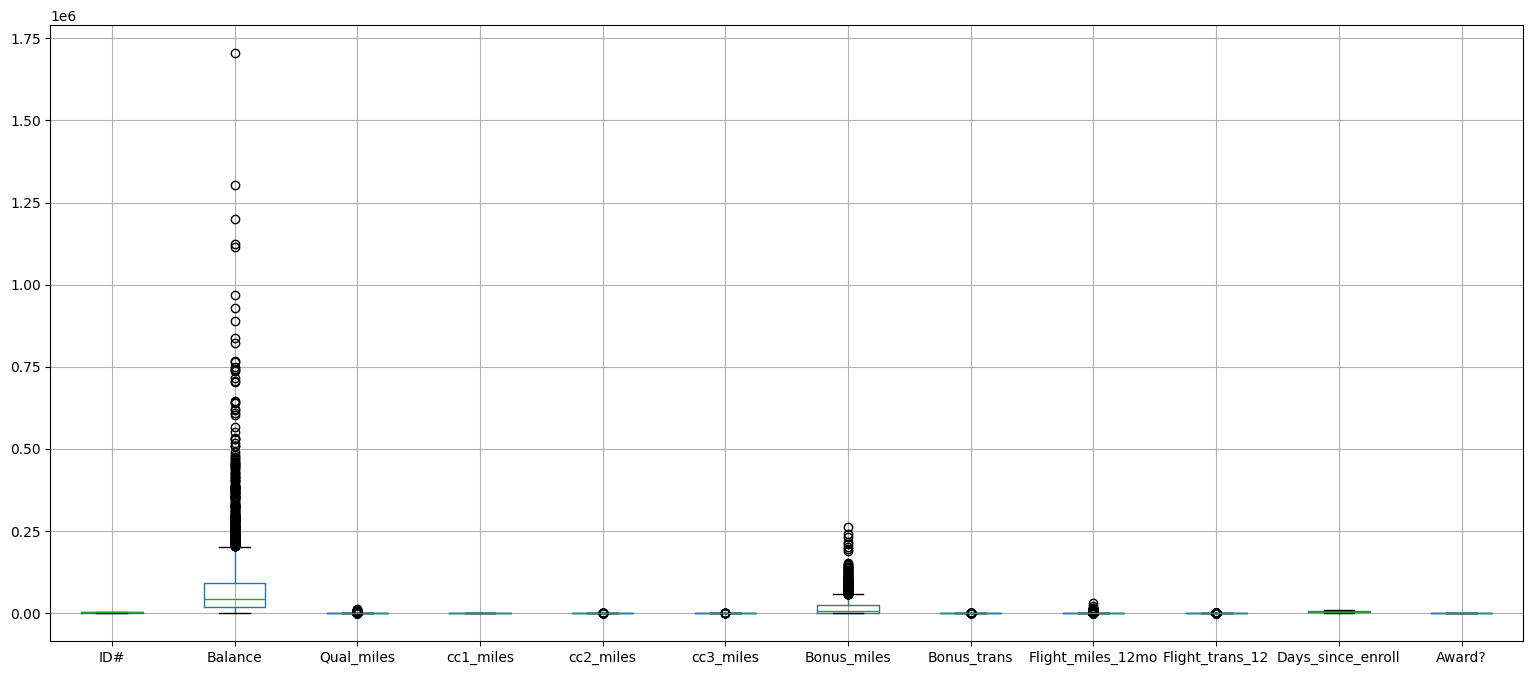

In [21]:
plt.figure(figsize=(19,8))
data.boxplot()

<Axes: >

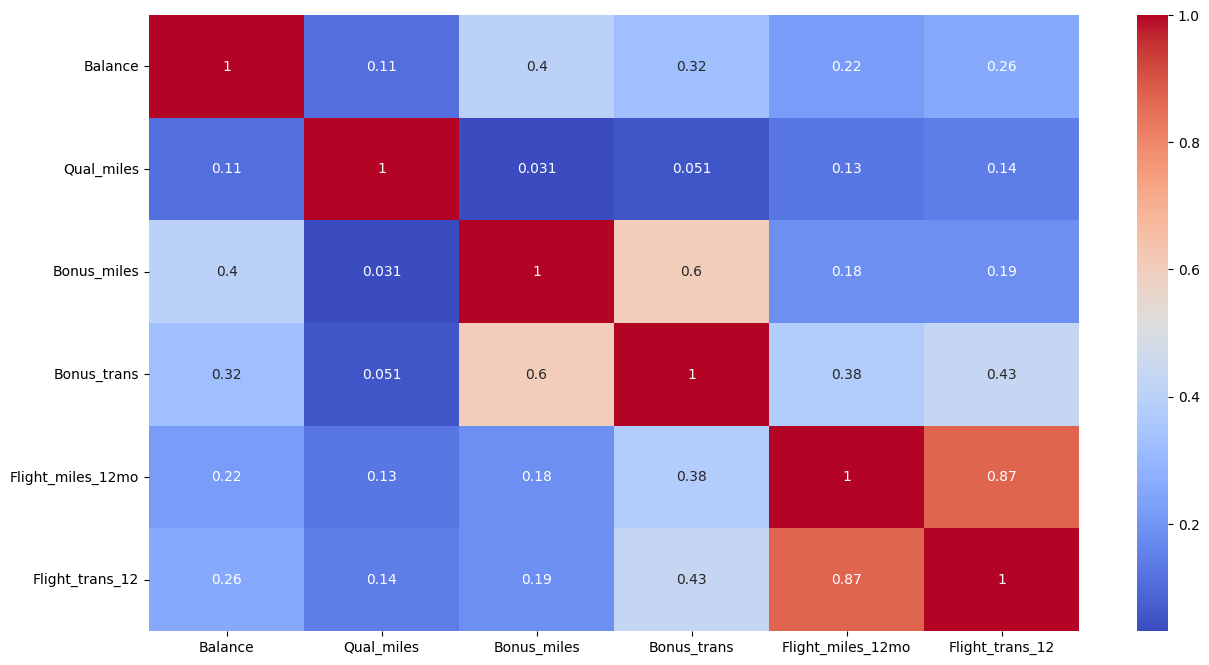

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(data.drop(['ID#','cc1_miles','cc2_miles','cc3_miles','Days_since_enroll','Award?'],axis = 1).corr()
            , annot = True, cmap = 'coolwarm')

In [23]:
# Drop irrevelant id column
data.drop('ID#',inplace = True,axis = 1)

In [24]:
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


<Axes: >

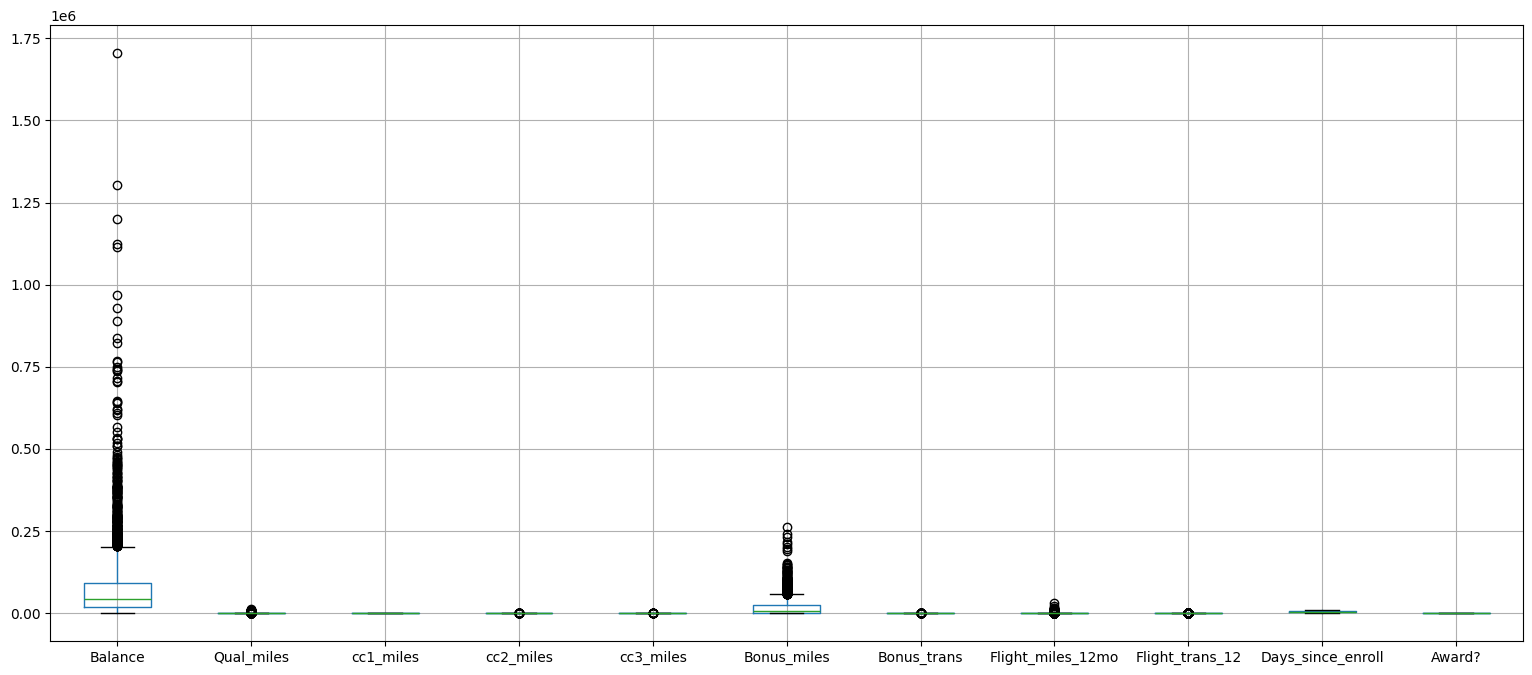

In [25]:
plt.figure(figsize=(19,8))
data.boxplot()

In [26]:
def capping(data,columns):
    for i in columns:
        Q1 = data[i].quantile(0.25)
        Q3 = data[i].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + (IQR * 1.5)
        lower_bound = Q1 - (IQR * 1.5)
        data[i] = data[i].clip(upper = upper_bound, lower = lower_bound)

In [27]:
for i in data.columns:
    print(f'Unique values of {i} are {data[i].nunique()}')

Unique values of Balance are 3904
Unique values of Qual_miles are 164
Unique values of cc1_miles are 5
Unique values of cc2_miles are 3
Unique values of cc3_miles are 5
Unique values of Bonus_miles are 2734
Unique values of Bonus_trans are 57
Unique values of Flight_miles_12mo are 343
Unique values of Flight_trans_12 are 35
Unique values of Days_since_enroll are 2820
Unique values of Award? are 2


In [28]:
capping(data,data.drop(['Flight_trans_12','Flight_miles_12mo','Qual_miles','cc1_miles','cc2_miles','cc3_miles','Award?'],axis = 1))

<Axes: >

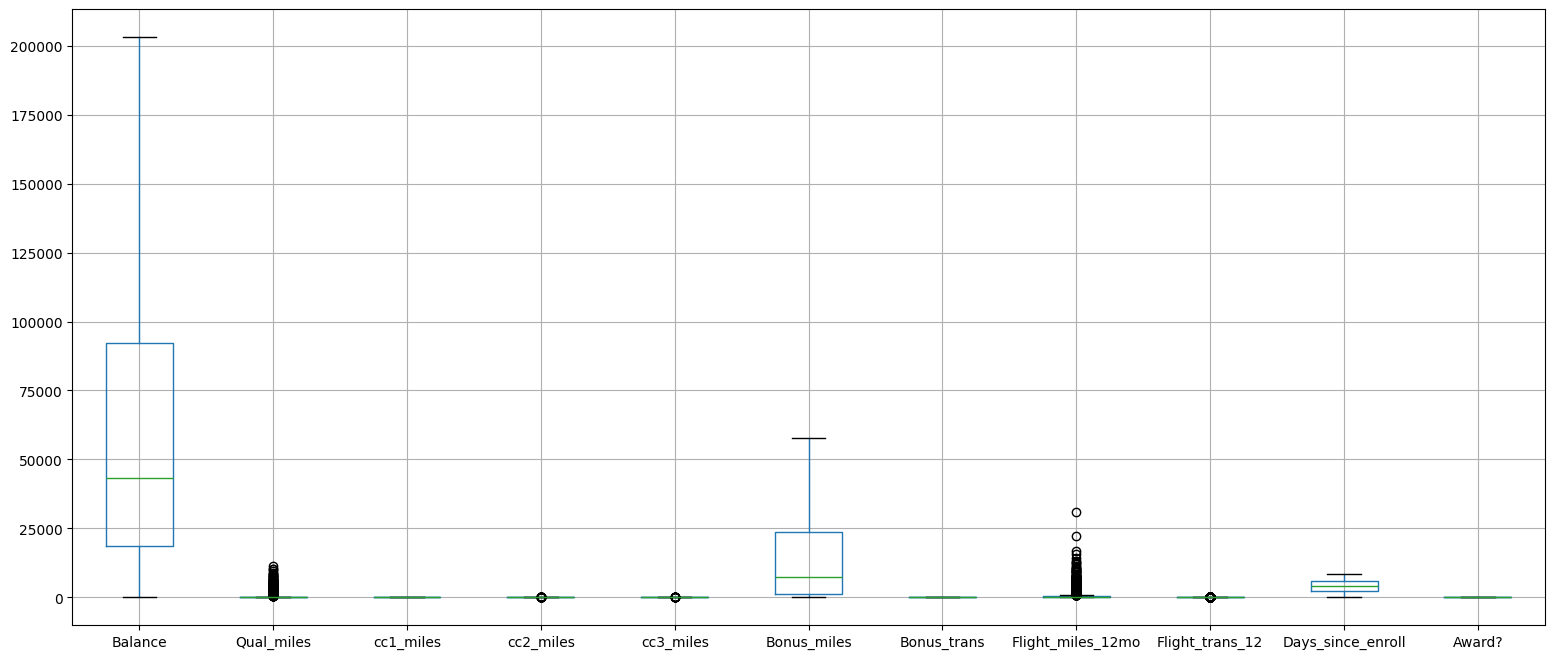

In [29]:
plt.figure(figsize=(19,8))
data.boxplot()

In [30]:
for i in data.columns:
    print(f'Unique values of {i} are {data[i].nunique()}')

Unique values of Balance are 3639
Unique values of Qual_miles are 164
Unique values of cc1_miles are 5
Unique values of cc2_miles are 3
Unique values of cc3_miles are 5
Unique values of Bonus_miles are 2458
Unique values of Bonus_trans are 39
Unique values of Flight_miles_12mo are 343
Unique values of Flight_trans_12 are 35
Unique values of Days_since_enroll are 2820
Unique values of Award? are 2


In [31]:
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143.0,0,1,1,1,174.0,1,0,0,7000,0
1,19244.0,0,1,1,1,215.0,2,0,0,6968,0
2,41354.0,0,1,1,1,4123.0,4,0,0,7034,0
3,14776.0,0,1,1,1,500.0,1,0,0,6952,0
4,97752.0,0,4,1,1,43300.0,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476.0,0,1,1,1,8525.0,4,200,1,1403,1
3995,64385.0,0,1,1,1,981.0,5,0,0,1395,1
3996,73597.0,0,3,1,1,25447.0,8,0,0,1402,1
3997,54899.0,0,1,1,1,500.0,1,500,1,1401,0


In [32]:
sc_columns = data.drop(['cc1_miles','cc2_miles','cc3_miles','Award?','Days_since_enroll'], axis = 1).columns.tolist() 
sc = StandardScaler()
data[sc_columns] = sc.fit_transform(data[sc_columns])

In [33]:
data.drop('Days_since_enroll', axis = 1, inplace = True) # It is not important in clustering  

In [34]:
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Award?
0,-0.607258,-0.186299,1,1,1,-0.843091,-1.148854,-0.328603,-0.362168,0
1,-0.758947,-0.186299,1,1,1,-0.840822,-1.039133,-0.328603,-0.362168,0
2,-0.382070,-0.186299,1,1,1,-0.624581,-0.819689,-0.328603,-0.362168,0
3,-0.835106,-0.186299,1,1,1,-0.825052,-1.148854,-0.328603,-0.362168,0
4,0.579265,-0.186299,4,1,1,1.543191,1.594189,1.154932,0.692490,1
...,...,...,...,...,...,...,...,...,...,...
3994,-0.772038,-0.186299,1,1,1,-0.381007,-0.819689,-0.185750,-0.098503,1
3995,0.010506,-0.186299,1,1,1,-0.798437,-0.709967,-0.328603,-0.362168,1
3996,0.167530,-0.186299,3,1,1,0.555335,-0.380802,-0.328603,-0.362168,1
3997,-0.151188,-0.186299,1,1,1,-0.825052,-1.148854,0.028531,-0.098503,0


In [35]:
# Apply VarianceThreshold to remove low variance features
selector = VarianceThreshold(threshold=0.6)  # Adjust threshold as needed
X_new = selector.fit_transform(data)

# Get selected features
selected_features = data.columns[selector.get_support()]
print(selected_features)


Index(['Balance', 'Qual_miles', 'cc1_miles', 'Bonus_miles', 'Bonus_trans',
       'Flight_miles_12mo', 'Flight_trans_12'],
      dtype='object')


### Agglomerative Clustering (Ward)

In [36]:
link = linkage(data[selected_features], method = 'ward')

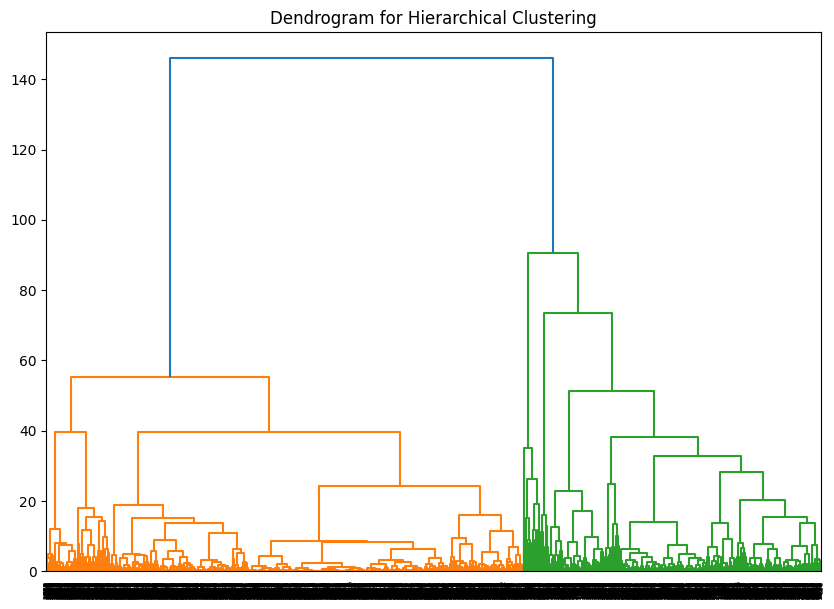

In [37]:
plt.figure(figsize=(10, 7))
plt.title('Dendrogram for Hierarchical Clustering')
dendrogram(link);

In [38]:
model = AgglomerativeClustering(n_clusters = 2, metric = 'euclidean', linkage = 'ward')
data['Ward_Cluster'] = model.fit_predict(data[selected_features])

In [39]:
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Award?,Ward_Cluster
0,-0.607258,-0.186299,1,1,1,-0.843091,-1.148854,-0.328603,-0.362168,0,1
1,-0.758947,-0.186299,1,1,1,-0.840822,-1.039133,-0.328603,-0.362168,0,1
2,-0.382070,-0.186299,1,1,1,-0.624581,-0.819689,-0.328603,-0.362168,0,1
3,-0.835106,-0.186299,1,1,1,-0.825052,-1.148854,-0.328603,-0.362168,0,1
4,0.579265,-0.186299,4,1,1,1.543191,1.594189,1.154932,0.692490,1,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.772038,-0.186299,1,1,1,-0.381007,-0.819689,-0.185750,-0.098503,1,1
3995,0.010506,-0.186299,1,1,1,-0.798437,-0.709967,-0.328603,-0.362168,1,1
3996,0.167530,-0.186299,3,1,1,0.555335,-0.380802,-0.328603,-0.362168,1,0
3997,-0.151188,-0.186299,1,1,1,-0.825052,-1.148854,0.028531,-0.098503,0,1


In [40]:
score = silhouette_score(data[selected_features], data['Ward_Cluster'])

In [41]:
print("silhouetee_score: ", score)

silhouetee_score:  0.4369857236012968


### Agglomerative Clustering (Average)

In [42]:
link1 = linkage(data[selected_features], method='average')

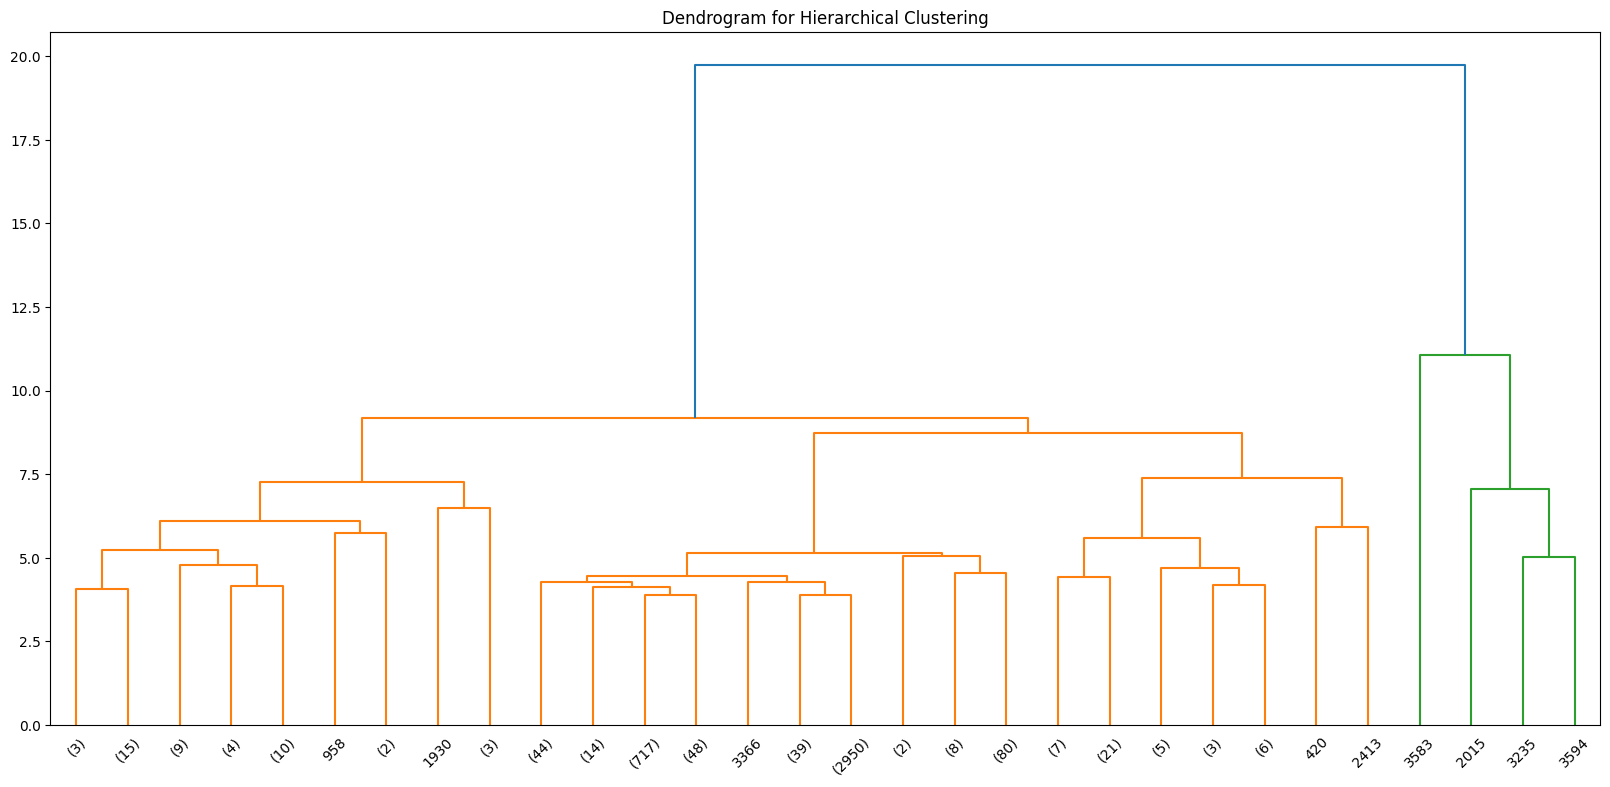

In [43]:
plt.figure(figsize=(20, 9))
plt.title('Dendrogram for Hierarchical Clustering')
dendrogram(link1,truncate_mode='lastp');

In [44]:
model1 = AgglomerativeClustering(n_clusters = 2, metric = 'euclidean', linkage = 'average')
data['Avg_Cluster'] = model1.fit_predict(data[selected_features])

In [45]:
score = silhouette_score(data[selected_features], data['Avg_Cluster'])

In [46]:
print("silhouetee_score: ", score)

silhouetee_score:  0.8310271659600628


In [47]:
data['Avg_Cluster'].value_counts() 

Avg_Cluster
1    3995
0       4
Name: count, dtype: int64

In [48]:
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Award?,Ward_Cluster,Avg_Cluster
0,-0.607258,-0.186299,1,1,1,-0.843091,-1.148854,-0.328603,-0.362168,0,1,1
1,-0.758947,-0.186299,1,1,1,-0.840822,-1.039133,-0.328603,-0.362168,0,1,1
2,-0.382070,-0.186299,1,1,1,-0.624581,-0.819689,-0.328603,-0.362168,0,1,1
3,-0.835106,-0.186299,1,1,1,-0.825052,-1.148854,-0.328603,-0.362168,0,1,1
4,0.579265,-0.186299,4,1,1,1.543191,1.594189,1.154932,0.692490,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.772038,-0.186299,1,1,1,-0.381007,-0.819689,-0.185750,-0.098503,1,1,1
3995,0.010506,-0.186299,1,1,1,-0.798437,-0.709967,-0.328603,-0.362168,1,1,1
3996,0.167530,-0.186299,3,1,1,0.555335,-0.380802,-0.328603,-0.362168,1,0,1
3997,-0.151188,-0.186299,1,1,1,-0.825052,-1.148854,0.028531,-0.098503,0,1,1


### K-means Clustering

In [49]:
wcss = []
k = range(1,11)
for i in k:
    kmeans = KMeans(n_clusters=i, random_state = 42)
    kmeans.fit(data[selected_features])
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'Within-Cluster Sum of Squares (WCSS)')

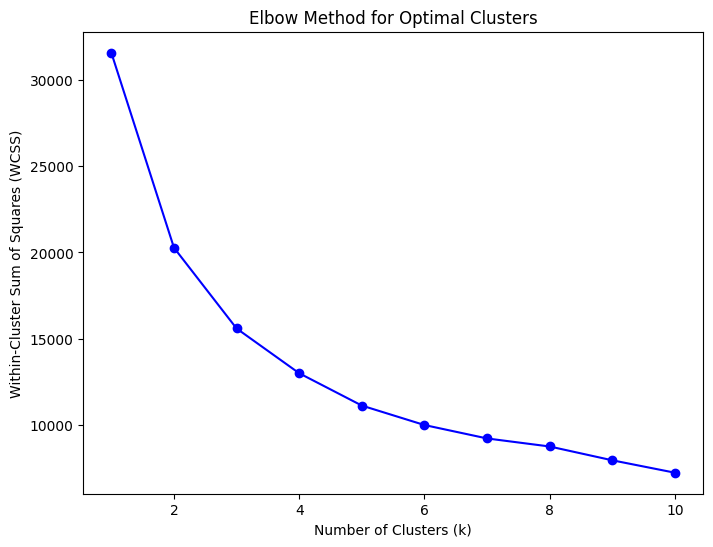

In [50]:
plt.figure(figsize=(8, 6))
plt.plot(k, wcss, marker='o', linestyle='-', color='blue')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')

In [51]:
k_means = KMeans(n_clusters=4, random_state=42)
data['K_means_Cluster'] = k_means.fit_predict(data[selected_features])

In [52]:
kmeans_silhouette = silhouette_score(data[selected_features], data['K_means_Cluster'])
print(f"K-Means Silhouette Score: {kmeans_silhouette}")

K-Means Silhouette Score: 0.48121361027396947


### DBSCAN

In [53]:
dbscan = DBSCAN(eps=0.5, min_samples=14) # 2 * number of features for min_samples (thumb rule)
data['DBSCAN_Cluster'] = dbscan.fit_predict(data[selected_features])

In [54]:
labels = data['DBSCAN_Cluster'] 
# ignoring -1 as it is noise points
dbscan_silhouette = silhouette_score(data[selected_features][labels!=-1], data['DBSCAN_Cluster'][labels!=-1])
print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")

DBSCAN Silhouette Score: 0.3535174595733489
